***SUPERMARKET SALES FOR THREE MONTHS- Product performance Analysis with product rating Analysis

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
df=pd.read_csv('supermarket_sales_3months.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               691 non-null    object 
 1   Branch                   691 non-null    object 
 2   City                     691 non-null    object 
 3   Customer type            691 non-null    object 
 4   Gender                   691 non-null    object 
 5   Product line             691 non-null    object 
 6   Unit price               691 non-null    float64
 7   Quantity                 691 non-null    int64  
 8   Tax 5%                   691 non-null    float64
 9   Total                    691 non-null    float64
 10  Date                     691 non-null    object 
 11  Time                     691 non-null    object 
 12  Payment                  691 non-null    object 
 13  cogs                     691 non-null    float64
 14  gross margin percentage  6

In [4]:
df.size

11747

In [5]:
df.shape

(691, 17)

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
#rename cogs to sales column
df.rename(columns={'cogs':'Sales'}, inplace=True)

#Rename Total as Total sales after tax.
df.rename(columns={'Total':'Total_sales_after_tax'}, inplace=True)

#Rename product line as product_line.
df.rename(columns={'Product line':'Product_line'}, inplace=True)

#Rename Customer type as Customer_type.
df.rename(columns={'Customer type':'Customer_type'}, inplace=True)

#add month columns
df['Month']=pd.to_datetime(df['Date']).dt.month
df.head(5)

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit price,Quantity,Tax 5%,Total_sales_after_tax,Date,Time,Payment,Sales,gross margin percentage,gross income,Rating,Month
0,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
1,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27/01/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
2,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,25/03/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,3
3,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,25/02/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2
4,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,24/02/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,2


In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total_sales_after_tax,Sales,gross margin percentage,gross income,Rating,Month
count,691.000000,691.000000,691.000000,691.000000,691.000000,6.910000e+02,691.000000,691.000000,691.000000
mean,56.393111,5.457308,15.331925,321.970420,306.638495,4.761905e+00,15.331925,6.905789,1.959479
std,26.478253,2.930472,11.583572,243.255009,231.671438,5.244049e-14,11.583572,1.741645,0.846874
min,10.080000,1.000000,0.604500,12.694500,12.090000,4.761905e+00,0.604500,4.000000,1.000000
25%,33.635000,3.000000,5.789500,121.579500,115.790000,4.761905e+00,5.789500,5.500000,1.000000
50%,56.040000,5.000000,12.151500,255.181500,243.030000,4.761905e+00,12.151500,6.900000,2.000000
75%,78.225000,8.000000,22.428000,470.988000,448.560000,4.761905e+00,22.428000,8.400000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000,3.000000


Interpretation:The avg unit price is $56.04 of 5qty per product lines; avg sales of $243.03; avg gross income $12.15 and an avg month of 2nd month (February).

In [9]:
#Descriptive analysis on categorical variable
cat_var=df.describe(include='O')
cat_var

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
count,691,691,691,691,691,691,691,691,691
unique,691,3,3,2,2,6,62,417,3
top,891-01-7034,A,Yangon,Normal,Male,Electronic accessories,15/02/2019,14:42,Cash
freq,1,235,235,352,355,123,19,7,247


*Interpretation: Descriptive analysis of the catergorical variables. The top branch is A; City as Yangon; product line as "Electronic accessories"; mode of payment as Cash. 

***Product Performance Analysis:

        Product_line with the highest volume
        Product lines volume at each branch and location
        Association among the customer type to Product_lines
        Product lines in relation to customer type and model of payment
        Sum group of product_lines
        To determine the top ten products for the year 2019
        To determine the top selling products in terms of volumes for the year 2019
        To determine the product_line with the highest unit price
        To determine the product_line with the highest gross income
        Data visualisation on sales of product_line at each branch; city
        Product_line rating and data visualisation on average product_line rating.        

In [10]:
#Frequncy Product lines with the highest volume.
pd.crosstab(index=df["Product_line"],columns=['Product_line'])     

col_0,Product_line
Product_line,
Electronic accessories,123
Fashion accessories,120
Food and beverages,122
Health and beauty,107
Home and lifestyle,101
Sports and travel,118


**Interpretation: Electronic accessories has the highest volume(123), while Home and lifstlye products has the lowest volume(101).

In [11]:
#Frequency of Product_line at each City.
pd.crosstab(df['Product_line'],df.City)

City,Mandalay,Naypyitaw,Yangon
Product_line,,,
Electronic accessories,36,42,45
Fashion accessories,45,41,34
Food and beverages,34,42,46
Health and beauty,41,36,30
Home and lifestyle,27,31,43
Sports and travel,46,35,37


In [12]:
#Frequency of Product_line at each branches.
pd.crosstab(df['Product_line'],df.Branch)

Branch,A,B,C
Product_line,,,
Electronic accessories,45,36,42
Fashion accessories,34,45,41
Food and beverages,46,34,42
Health and beauty,30,41,36
Home and lifestyle,43,27,31
Sports and travel,37,46,35


In [13]:
#Tabulation of customer type patronage by product lines.
pd.crosstab(df['Customer_type'],df.Product_line)

Product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer_type,,,,,,
Member,55,60,61,49,54,60
Normal,68,60,61,58,47,58


***Food and beverages product_line has the highest customer type "Member", while Electronic accessories product_line has the highest customer type "Normal".

In [14]:
#HO:There is an association between the product_line and customer_type
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.Product_line, df.Customer_type))

(2.4063185173440527,
 0.7905327985203656,
 5,
 array([[60.34298119, 62.65701881],
        [58.87120116, 61.12879884],
        [59.85238784, 62.14761216],
        [52.4934877 , 54.5065123 ],
        [49.54992764, 51.45007236],
        [57.89001447, 60.10998553]]))

***Interpretation: P-value is 0.7905 and alpha is 0.05 and P-value is > alpha value. Therefore, we accept Ho and reject Ha.

***Conclusion: There is an association between Customer_type and Product_line. 

In [15]:
#Frequency table of on each product_lines mode payment terms.
pd.crosstab(df['Payment'],df.Product_line)

Product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Payment,,,,,,
Cash,48,40,41,38,34,46
Credit card,31,37,46,32,29,38
Ewallet,44,43,35,37,38,34


In [16]:
#What product sold most in terms of sum volume.
df.groupby('Product_line').sum()

,Unit price,Quantity,Tax 5%,Total_sales_after_tax,Sales,gross margin percentage,gross income,Rating,Month
Product_line,,,,,,,,,
Electronic accessories,6636.87,731,1946.9085,40885.0785,38938.17,585.714286,1946.9085,826.6,248
Fashion accessories,6845.13,591,1668.0575,35029.2075,33361.15,571.428571,1668.0575,832.2,236
Food and beverages,6978.33,647,1832.3570,38479.4970,36647.14,580.952381,1832.3570,866.4,241
Health and beauty,5863.49,579,1585.8925,33303.7425,31717.85,509.523810,1585.8925,732.0,206
Home and lifestyle,5860.65,564,1688.2475,35453.1975,33764.95,480.952381,1688.2475,686.5,203
Sports and travel,6783.17,659,1872.8970,39330.8370,37457.94,561.904762,1872.8970,828.2,220


***Interpretation:
    Electronic accessories has the highest sales ($38,938.17), with 248days, highest rating of 826.6. 

In [17]:
#The total sum aggregate of each product line to sales, quantity, unit price and gross income.
df_products = df.groupby('Product_line', as_index=False).agg({"Sales":"sum", "Quantity":"sum", "Unit price":"sum", "gross income":"sum"})
df_products.head(8)

,Product_line,Sales,Quantity,Unit price,gross income
0,Electronic accessories,38938.17,731,6636.87,1946.9085
1,Fashion accessories,33361.15,591,6845.13,1668.0575
2,Food and beverages,36647.14,647,6978.33,1832.3570
3,Health and beauty,31717.85,579,5863.49,1585.8925
4,Home and lifestyle,33764.95,564,5860.65,1688.2475
5,Sports and travel,37457.94,659,6783.17,1872.8970


In [18]:
#The top product_lines
df_Product_line_Sales = df.groupby(['Product_line']).sum()['Sales'].sort_values(ascending=False)
df_Product_line_Sales.head(8)

Product_line
Electronic accessories    38938.17
Sports and travel         37457.94
Food and beverages        36647.14
Home and lifestyle        33764.95
Fashion accessories       33361.15
Health and beauty         31717.85
Name: Sales, dtype: float64

**Interpretation: Within the three months "Electronic accessories" recorded the top sales of $38938.17 among others.

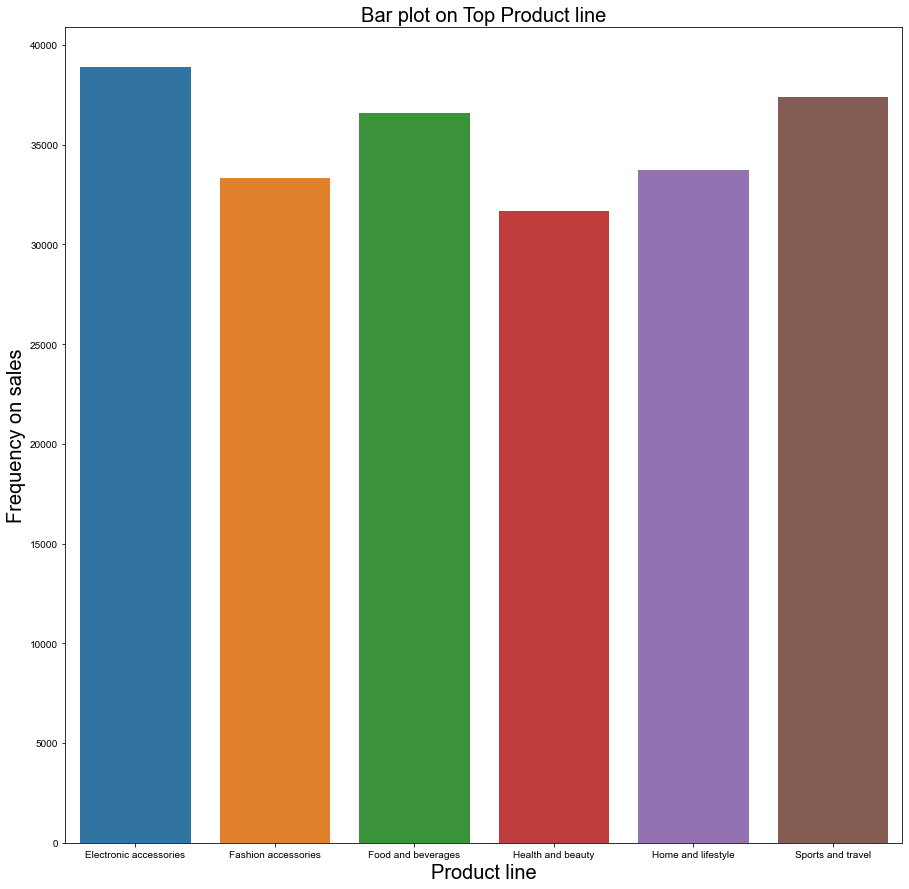

In [19]:
#New dataframe for product line and sales from the sum aggregate.
df_products[df_products['Sales']>5]

#Kind of plot and style
f, axes = plt.subplots(figsize = (15,15))
sns.set_style("darkgrid")

fig1 = sns.barplot(x = 'Product_line', y = 'Sales', data = df_products[df_products['Sales']>5])
plt.title('Bar plot on Top Product line', fontsize=20)
plt.xlabel('Product line', fontsize=20)
plt.ylabel('Frequency on sales', fontsize=20)
plt.show()

**Interpretation: Within the three months "Electronic accessories" with colour blue has the highest sales of $38,938.17.

In [20]:
#The top selling product line.
Top_selling_products = df.groupby(['Product_line']).sum()['Quantity'].sort_values(ascending=False)
Top_selling_products.head(8)

Product_line
Electronic accessories    731
Sports and travel         659
Food and beverages        647
Fashion accessories       591
Health and beauty         579
Home and lifestyle        564
Name: Quantity, dtype: int64

**Interpretation: Within the three months "Electronic accessories" has the highest quantity volume of 731.

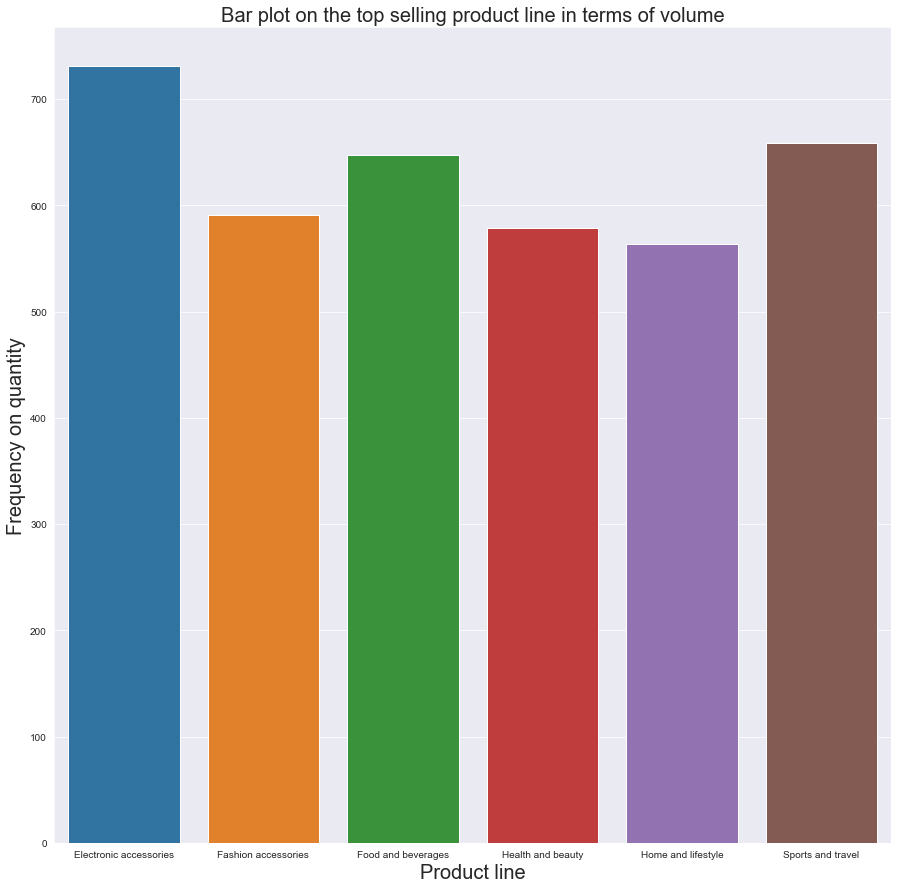

In [21]:
#New dataframe for product line and sales from the sum aggregate.
df_products[df_products['Quantity']>5]

#Kind of plot and style
f, axes = plt.subplots(figsize = (15,15))
sns.set_style("darkgrid")

fig2 = sns.barplot(x = 'Product_line', y = 'Quantity', data = df_products[df_products['Quantity']>5])
plt.title('Bar plot on the top selling product line in terms of volume', fontsize=20)
plt.xlabel('Product line', fontsize=20)
plt.ylabel('Frequency on quantity', fontsize=20)
plt.show()

**Interpretation: Within the three months "Home and lifestyle" in colour purple has the lowest quantity volume of 564.

In [22]:
#The product_line with the highest unit price in dollars.
Top_products_UP = df.groupby(['Product_line']).sum()['Unit price'].sort_values(ascending=False)
Top_products_UP.head(8)

Product_line
Food and beverages        6978.33
Fashion accessories       6845.13
Sports and travel         6783.17
Electronic accessories    6636.87
Health and beauty         5863.49
Home and lifestyle        5860.65
Name: Unit price, dtype: float64

**Interpretation: Within the three months "Food and beverages" has the highest unit price of $6,978.33

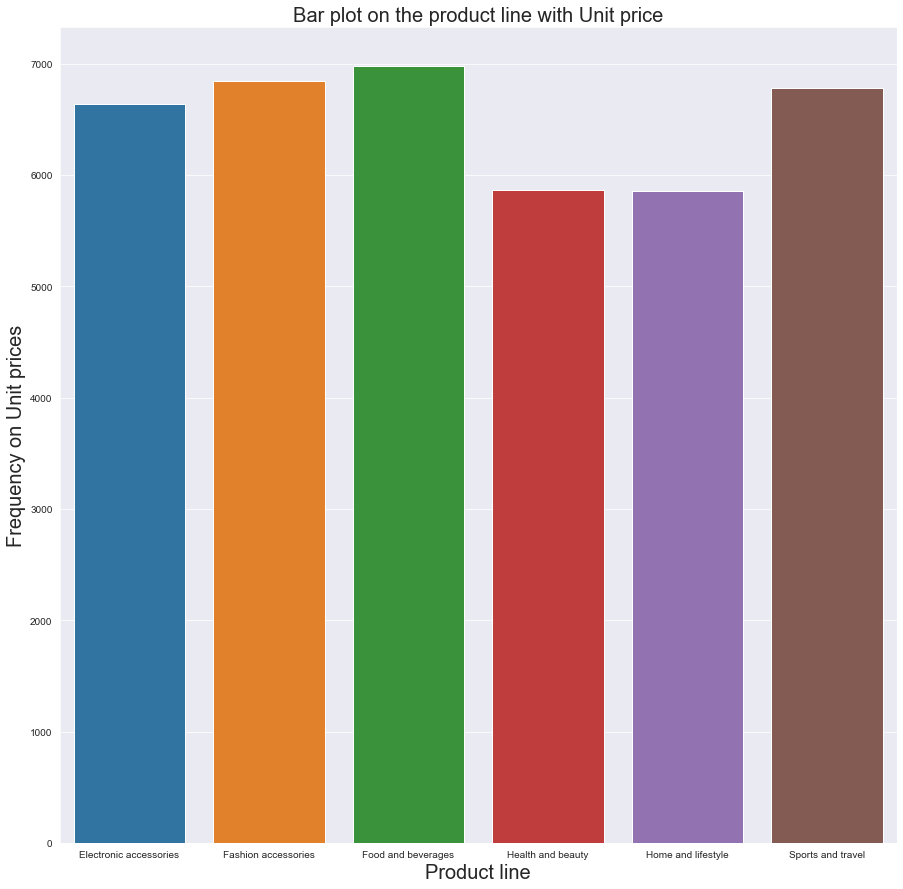

In [23]:
#New dataframe for product line and sales from the sum aggregate.
df_products[df_products['Unit price']>5]

#Kind of plot and style
f, axes = plt.subplots(figsize = (15,15))
sns.set_style("darkgrid")

fig3 = sns.barplot(x = 'Product_line', y = 'Unit price', data = df_products[df_products['Unit price']>5])
plt.title('Bar plot on the product line with Unit price', fontsize=20)
plt.xlabel('Product line', fontsize=20)
plt.ylabel('Frequency on Unit prices', fontsize=20)
plt.show()

**Interpretation: Within the three months "Food and beverages" has the highest unit price of $6,978.33 and "Home and lifestyle" has the lowest unit price of $5860.65

In [24]:
#The product_line with th highest gross income.
Top_product_GI = df.groupby(['Product_line']).sum()['gross income'].sort_values(ascending=False)
Top_product_GI.head(8)

Product_line
Electronic accessories    1946.9085
Sports and travel         1872.8970
Food and beverages        1832.3570
Home and lifestyle        1688.2475
Fashion accessories       1668.0575
Health and beauty         1585.8925
Name: gross income, dtype: float64

**Interpretation: Within the three months "Electronic accessories" has the highest gross income of $1946.9085.

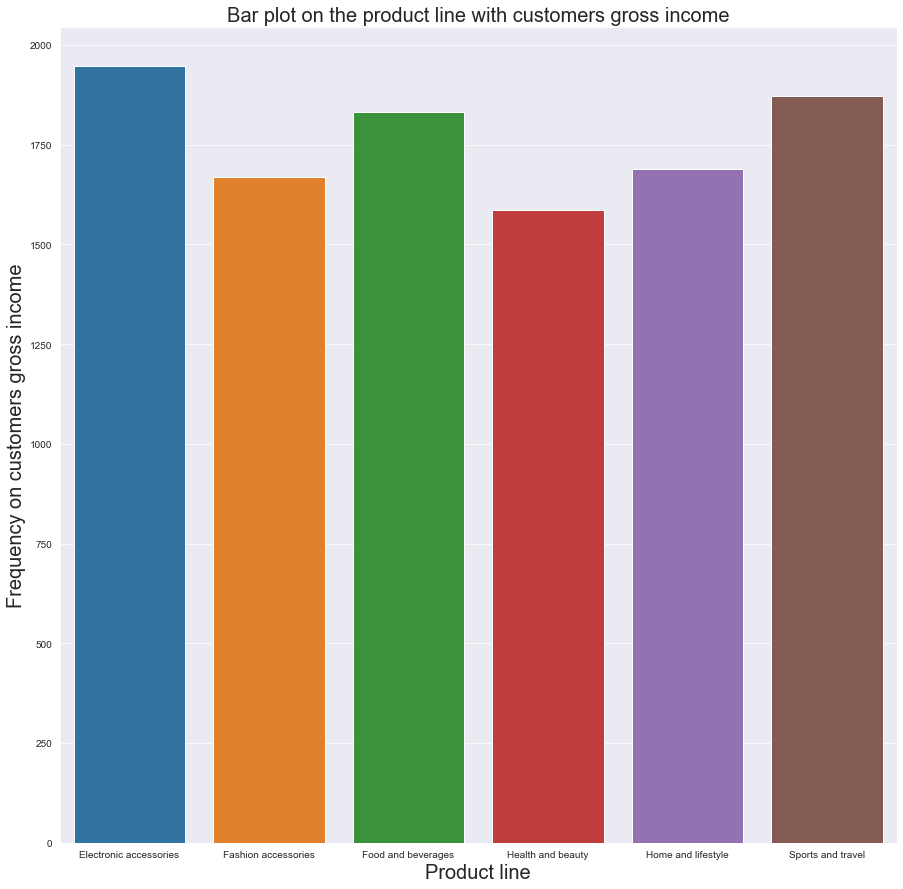

In [25]:
#New dataframe for product line and gross income from the sum aggregate.
df_products[df_products['gross income']>5]

#Kind of plot and style
f, axes = plt.subplots(figsize = (15,15))
sns.set_style("darkgrid")

fig4 = sns.barplot(x = 'Product_line', y = 'gross income', data = df_products[df_products['gross income']>5])
plt.title('Bar plot on the product line with customers gross income', fontsize=20)
plt.xlabel('Product line', fontsize=20)
plt.ylabel('Frequency on customers gross income', fontsize=20)
plt.show()

**Interpretation: Within the three months "Electronic accessories" with colour blue has the highest gross income.

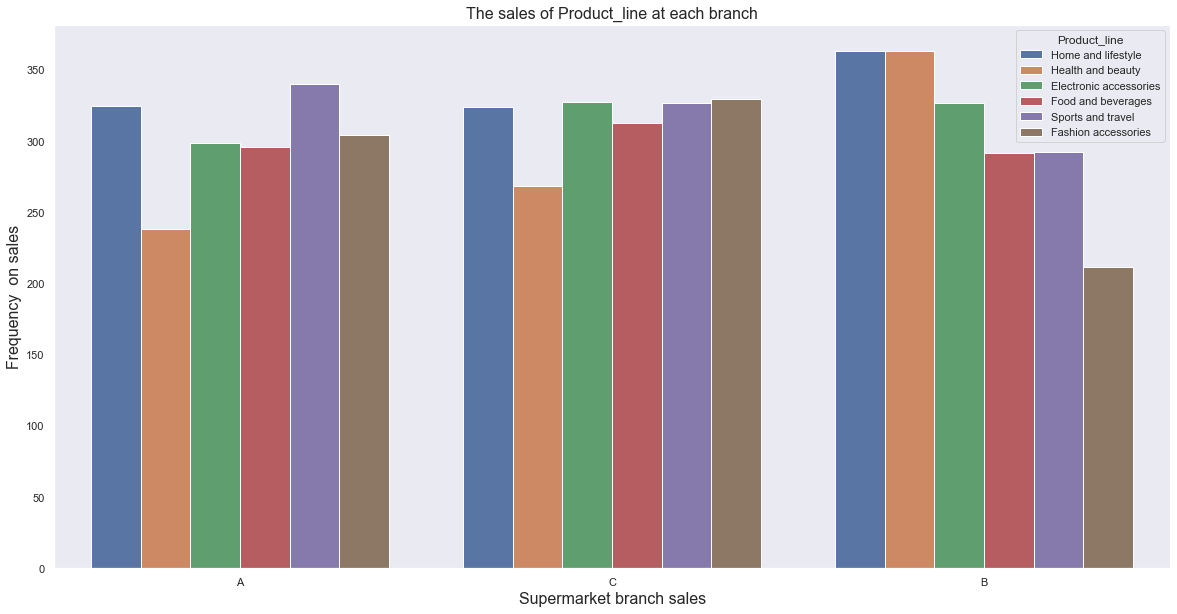

In [26]:
#Data visualisation on sales of product_line at each branch
sns.set(style='dark')
plt.figure(figsize=(20,10))
sns.barplot(y = 'Sales', x='Branch', hue = 'Product_line', data = df, ci = None)
plt.title('The sales of Product_line at each branch', fontsize=16)
plt.xlabel('Supermarket branch sales', fontsize=16)
plt.ylabel('Frequency  on sales', fontsize=16)
plt.show()

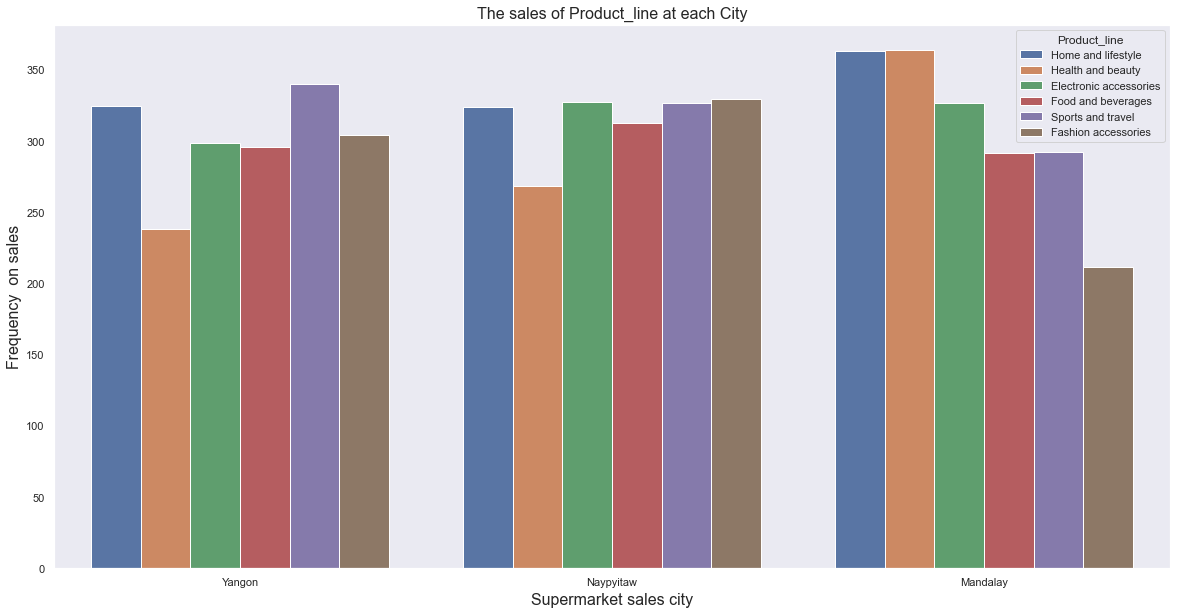

In [27]:
#Data visualisation on sales of product_line at each city
sns.set(style='dark')
plt.figure(figsize=(20,10))
sns.barplot(x = 'City', y = 'Sales', hue='Product_line', data = df, ci= None) 
plt.title('The sales of Product_line at each City', fontsize=16)
plt.xlabel('Supermarket sales city', fontsize=16)
plt.ylabel('Frequency  on sales', fontsize=16)
plt.show()

In [28]:
#Product_line rating
ratings_desc=df.groupby('Product_line')['Rating'].describe()
ratings_desc

,count,mean,std,min,25%,50%,75%,max
Product_line,,,,,,,,
Electronic accessories,123.0,6.720325,1.706495,4.0,5.450,6.4,7.850,10.0
Fashion accessories,120.0,6.935000,1.652381,4.0,5.575,6.9,8.225,9.9
Food and beverages,122.0,7.101639,1.741567,4.0,5.800,7.2,8.700,9.9
Health and beauty,107.0,6.841121,1.817626,4.0,5.100,6.8,8.400,10.0
Home and lifestyle,101.0,6.797030,1.781879,4.1,5.200,7.0,8.300,9.8
Sports and travel,118.0,7.018644,1.768526,4.1,5.600,6.9,8.575,10.0


Interpretation: Food and beverages product_line has an average rating 7.2%, while Electronic accessories has average rating of 6.4%.

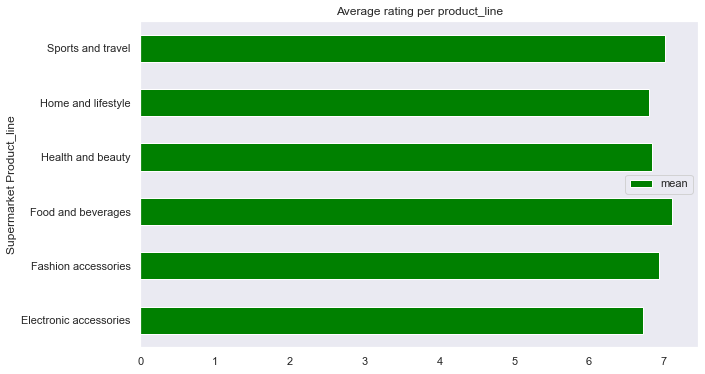

In [29]:
#Average product_line rating visualisaton.
Avg_Product_line_rating = ratings_desc.plot(kind='barh', y='mean', title='Average rating per product_line', color='green', figsize=(10,6), xlabel='Supermarket Product_line')

***Conclusion: Food and beverages has the highest unit price and rating, Electronic accessories had the highest selling product and the top product_line. 
   Therefore, Electronics accessories is the best product line at the supermarket for the year.